                          # Мы будем изучать методы визуализации, используя два набора данных:

## Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.

In [2]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
#display(covid_data.head())

vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]
#display(vaccinations_data.head())

# 1. Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()

# 2. Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

# 3. Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

# 4. Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()


# 5. В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# Задание 3.1
# За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
#display(covid_data['date'].max())
#display(covid_data['date'].min())

# Задание 3.2
# За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.
# Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД
#display(vaccinations_data['date'].max())
#display(vaccinations_data['date'].min())

# Задание 3.3
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.
# Сохраните таблицу covid_df — она понадобится нам в следующем юните.
# Сколько строк и столбцов в таблице covid_df?
# Введите ответ в виде двух чисел через дефис (например, 333-33): первое число — количество строк, второе число — количество столбцов.
covid_df = covid_data.merge(vaccinations_data,on=['date','country'],how='left')
covid_df.to_csv('data/covid_df.csv', index = False, sep=',')


# В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
display(covid_df.head(4))


######## Задание 3.4
# Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.



######## Задание 3.5
# Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
  






,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
# Задание 4.4
# С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?
# В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить последнее непустое значение в группах.
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

# Задание 4.5
# Постройте график из задания 4.4. В какой стране число вакцинированных наименьшее?


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
#display(covid_df.head(5))

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]
populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100

# Задание 6.4
# Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
# Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.

croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed'] / croped_covid_df['population']) * 100
#display(croped_covid_df['confirmed_per_hundred'])

pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
#display(pivot)

# Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

# Задание 6.5
# Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
# Выберите верные выводы по данному графику:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоровлений по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [ ]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

import plotly
import plotly.express as px
# Задание 7.5
# Постройте линейный график, который отображает, как изменялось ежедневное количество вакцинированных (daily_vaccinations) в мире во времени. Из графика найдите, чему равно количество вакцинированных (в миллионах) 28 февраля 2021 года (2021-02-28). Ответ округлите до целого числа.
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['daily_vaccinations'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Daily Vaccinations' #заголовок
)
fig.show()

# Задание 7.6
# Постройте анимированную тепловую картограмму для числа поставленных вакцин во всём мире (total_vaccinations). На полученной карте найдите, чему равно количество вакцинированных в Японии (Japan) на 24 марта 2021 года (2021-03-24). Ответ приведите в тысячах (без нулей) и округлите до целого числа.
# Примечание. Если в jupyter notebook в VS Code не запускается анимация тепловой карты, попробуйте отобразить график командой fig.show(renderer='notebook').
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')
#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Total Vaccinations', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
#отображаем график
fig.show()

### Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

Text(0.5, 1.0, 'Средний отток клиентов по категориям кредитного рейтинга и количеству лет пользования услугами банка')

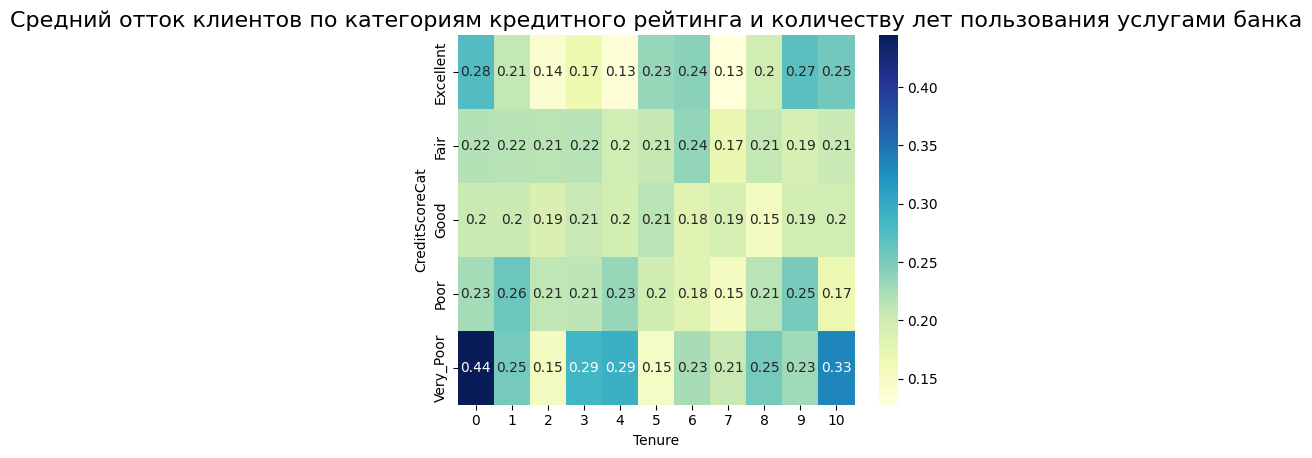

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
#display(churn_data.head(5))
#churn_data.info()

# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
# Вычислите процент ушедших и лояльных клиентов
##churn_counts = churn_data['Exited'].value_counts()
##labels = ['Ушедшие', 'Лояльные']
##sizes = [churn_counts[1], churn_counts[0]]

# Создайте круговую диаграмму
##fig, ax = plt.subplots()
##ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
##ax.axis('equal')  # Чтобы диаграмма выглядела как круг

# Отобразите график
##plt.show()

# Этот код создаст круговую диаграмму, которая покажет процентное соотношение между ушедшими и лояльными клиентами на основе данных

# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
#churn_balance = churn_data[churn_data['Balance'] > 2500]

# Metodo 1
##churn_balance.plot(
##    kind='hist',
##    figsize=(10, 6),
##    y='Balance',
##    x='CustomerId',
##    title='Распределение баланса пользователей, у которых на счету больше 2,500 долларов',
##    grid = True,
##    color = 'black',
##    bins=10
##);

# Metodo 2
##plt.figure(figsize=(10, 6))
##plt.hist(churn_balance['Balance'], bins=10, color='black')
##plt.title('Распределение баланса пользователей, у которых на счету больше 2,500 долларов')
##plt.xlabel('Баланс')
##plt.ylabel('Число пользователей')
##plt.grid(True)

##plt.show()

## Теперь о распределении и выводах:
# График будет показывать, как распределен баланс среди пользователей, у которых на счету больше 2,500 долларов. Горизонтальная ось представляет собой диапазон балансов, разбитый на 10 интервалов (бинов), а вертикальная ось показывает количество пользователей в каждом из этих интервалов.

## Анализируя график, вы сможете сделать следующие выводы:
# Выявление паттернов: График позволяет определить, какие диапазоны балансов наиболее популярны среди пользователей с более чем 2,500 долларами на счету.
# Пиковые значения: График может показать наличие пиковых значений, которые могут быть интересными для бизнес-анализа. Например, вы можете обнаружить, что большинство пользователей имеют баланс в определенном диапазоне.
# Распределение: График позволяет оценить форму распределения балансов. Это может быть нормальным (колоколообразным), равномерным, экспоненциальным и т.д. Знание формы распределения может помочь в принятии решений и планировании.
# Инсайты: График может использоваться для выявления необычных или выбивающихся значений, которые могут потребовать дополнительного анализа.
# Обратите внимание, что результаты зависят от данных и могут варьироваться. Для более точных выводов иногда полезно использовать дополнитель# ные статистические методы, такие как расчет среднего, медианы и стандартного отклонения балансов.

# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
 
##churn_departed = churn_data[churn_data['Exited'] == 1]
##churn_loyal = churn_data[churn_data['Exited'] == 0]

##fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

##axes[0].hist(
##    x=churn_departed['Balance'], label='Exited', color="lime", bins=20
##)
##axes[0].set_title("Распределение баланса ушедших клиентов")
##axes[0].set_xlabel("Баланс")
##axes[0].set_ylabel("Число клиентов")

##axes[1].hist(
##    x=churn_loyal['Balance'], label='Loyal', color="blue", bins=20
##)
##axes[1].set_title("Распределение баланса лояльных клиентов")
##axes[1].set_xlabel("Баланс")
##axes[1].set_ylabel("Число клиентов")

##plt.show()

# Что касается ваших вопросов о различиях в балансе между ушедшими и лояльными клиентами, это может быть связано 
# с различными факторами. Например, ушедшие клиенты могли иметь меньший баланс на своих счетах по разным причинам, 
# таким как недовольство услугами банка, низкая заработная плата, наличие других финансовых обязательств, или изменение финансовой ситуации.
# Это может быть одной из причин, почему они решили уйти из банка. Путем анализа данных о клиентах и
# других переменных вы можете более точно определить, какие факторы оказывают наибольшее влияние на решение клиентов об оттоке.

# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

##fig = plt.figure(figsize=(13, 10))
##boxplot = sns.boxplot(
##    data=churn_data,
##    y='Age',
##    x='CustomerId',
##    orient='h',
##    width=0.9
##)
##boxplot.set_title('Распределение возраста в разрезе признака оттока.');
##boxplot.set_xlabel('категория клиентов');
##boxplot.set_ylabel('возраст');
##boxplot.grid()

# Чтобы определить, в какой из групп больше потенциальных выбросов, вам следует оценить график более внимательно:

# 1. Потенциальные выбросы будут отображаться в виде точек за пределами "усов" (whiskers) на графике "ящик с усами". 
# Если какая-то категория клиентов имеет больше точек за пределами "усов", то это может считаться группой с большим количеством потенциальных выбросов.

# 2. Вы также можете рассмотреть, в какой из категорий клиентов "усы" (ящика) более длинные. 
# Длинные "усы" могут указывать на большую изменчивость возраста в этой категории.

# 3. Изучите график визуально, чтобы определить, какие возрастные категории клиентов выделяются на графике, и обратите на них внимание.

# Если возрастные категории клиентов имеют большое количество потенциальных выбросов или высокую изменчивость возраста, 
# это может быть интересным для банка. Эти категории клиентов могут потребовать дополнительного анализа
# для выяснения причин выбросов или изменчивости в возрасте.

# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
##plt.title('Взаимосвязь между кредитным рейтингом и предполагаемой зарплатой')
##fig = plt.figure(figsize=(12, 8))
##axes = fig.add_axes([0, 0, 1, 1])
##axes.scatter(
##    x=churn_data['EstimatedSalary'],
##    y=churn_data['CreditScore'],
##    c=churn_data['CustomerId'],  # Цвет точек на основе признака оттока
##    cmap='coolwarm',  # Цветовая палитра
##    s=100,  # Размер точек
##    marker='^'
##)
##plt.xlabel('Предполагаемая зарплата')
##plt.ylabel('Кредитный рейтинг')
##plt.title('Взаимосвязь между кредитным рейтингом и предполагаемой зарплатой')
##plt.show()

# В этом коде:
# Мы используем churn_data['CustomerId'] для определения цвета точек в зависимости от оттока клиентов.
# cmap='coolwarm' определяет цветовую палитру для лучшей визуализации.
# Мы добавили метки осей и заголовок графика для лучшей интерпретации данных.
# После внесения этих изменений вы сможете более точно оценить взаимосвязь между кредитным рейтингом и 
# предполагаемой зарплатой в контексте оттока клиентов.
# признаки взаимосвязи между признаками не явные 

# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).
##exit_gender = churn_data.groupby(['Gender'])['Exited'].mean().reset_index()

#строим график
##fig = px.bar(
##    data_frame=exit_gender, #датафрейм
##    x="Gender", #ось x
##    y="Exited", #ось y
##    color='Gender', #расцветка в зависимости от страны
##    text = 'Gender', #текст на столбцах
##    orientation='v', #ориентация графика
##    height=500, #высота
##    width=1000, #ширина
##    title='Доля ушедших клиентов по гендеру' #заголовок
##)

#отображаем его
##fig.show()


# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

##fig = plt.figure(figsize=(8, 5))
##exit_Products = churn_data.groupby(['NumOfProducts'])['Exited'].mean().reset_index() 
##barplot = sns.barplot(
##    data=exit_Products,
##    x='NumOfProducts',
##    y='Exited',
##)
##barplot.set_title('Отток клиентов в зависимости от числа приобретённых услуг в банке');


# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


##active_Member = churn_data.groupby('IsActiveMember')['Exited'].mean().reset_index()


##fig = px.bar(
##    data_frame=active_Member,  # DataFrame
##    x='IsActiveMember',  # x-axis
##    y='Exited',  # y-axis
##    color='IsActiveMember',  # color representation based on membership status
##    text='Exited',  # text on bars
##    orientation='v',  # orientation of the chart (vertical)
##    height=500,  # height
##    width=1000,  # width
##    title='Влияние статуса активного членства на уровень оттока'  # title
##)

##fig.show()

# Для уменьшения оттока клиентов среди неактивных можно предложить ряд мероприятий, направленных на стимулирование активности клиентов и
# улучшение их участия. Некоторые из этих мер могут включать в себя:

# Персонализированные программы стимулирования: Создание индивидуальных программ лояльности и стимулирования для неактивных клиентов,
# предоставляя им бонусы, скидки или дополнительные услуги за активное участие.

# Улучшение коммуникации и обратной связи: Регулярная и персонализированная коммуникация с неактивными клиентами для понимания их потребностей,
# жалоб и предложений. Это может быть осуществлено через электронные письма, опросы, или даже индивидуальные консультации.

# Улучшение услуг и продуктов для неактивных клиентов: Изучение причин их неактивности, а также предоставление новых услуг или улучшение текущих,
# чтобы удовлетворить их потребности.

# Обучение и обратная связь: Предоставление информации о преимуществах активного участия и обучение клиентов, 
# как эффективно использовать продукты или услуги банка.

# Анализ поведения и внедрение прогностических инструментов: Использование аналитики для предсказания поведения клиентов и 
# их склонности к оттоку, что позволит принимать меры заранее.

# Создание более удобных условий активации: Облегчение или упрощение процесса активации для клиентов, а также предоставление поддержки в 
# случае возникновения проблем или вопросов.

# Это лишь несколько возможных шагов, которые банк может предпринять для уменьшения оттока клиентов среди неактивных. 
# Каждый из них требует дальнейшего изучения и тестирования для определения наиболее эффективных подходов в конкретной ситуации.

# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

##fig = px.choropleth(
##    churn_data,  # Используем данные о доле ушедших клиентов
##    locations="Geography",  # Столбец с названиями стран
##    locationmode="country names",  # Режим сопоставления стран
##    color="Exited",  # Числовое значение, от которого зависит цвет
##    hover_name="Geography",  # Название страны при наведении
##    color_continuous_scale='Reds',  # Палитра цветов
##    title='Доля ушедших клиентов в разных странах'  # Заголовок карты
##)

##fig.update_layout(geo=dict(showframe=True))  # Отключаем рамку стран

##fig.show()

# Этот код создаст тепловую карту, где разные страны будут окрашены в соответствии с долей ушедших клиентов. Чем интенсивнее цвет, тем выше доля ушедших клиентов в этой стране.

# Что касается возможных причин большей доли ушедших клиентов в определенной стране, это может быть связано с различными факторами,
# включая экономическую ситуацию, качество предоставляемых услуг, конкуренцию на рынке, особенности потребительского поведения и т. д.
# Тщательный анализ данных, включая дополнительные факторы, мог бы дать более точное представление о причинах такого явления.


# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.


churn_data['CreditScore'] = churn_data['CreditScore'].astype('category')
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')

# Создание сводной таблицы среднего оттока
pivot_table = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
display(pivot_table)

# Построение тепловой карты
heatmap = sns.heatmap(data=pivot_table, annot=True, cmap='YlGnBu')
heatmap.set_title('Средний отток клиентов по категориям кредитного рейтинга и количеству лет пользования услугами банка', fontsize=16)




































   






